In [1]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u

import os
import get_halpha_SB

%matplotlib inline

%run 'load_data.ipynb'
%run 'add_noise.ipynb'
%run 'extract_FOV.ipynb'

In [40]:
%run 'make_mockobs.ipynb'

In [2]:
machine='chinook'

distance = '980Mpc'; resolution = None; slicewidth = 20

data_tuple_20 = loaddata(machine=machine,resolution=resolution,distance=distance,slicewidth=slicewidth,DragonflyTelescope=False)


Resolution is None, finding minimum resolution of the similuation...
The resolution of the raw simulation at 980Mpc is 0.658865696816.
Loading data of slicewidth 20 (after rounding), number of slices is 4
./intermediatedata/data_980Mpc_1arcsec_20slwd.npz exists, loading now...
./intermediatedata/data_980Mpc_1arcsec_20slwd.npz was not saved as a tuple since too large, returning as tuple with 32000,1,0.658865696816 appended.


In [3]:
data_tuple_20[0].shape


(32000, 32000)

In [4]:
resolution = 0.6 # arcsec
print 0.5*60*60
data_FOV, xystarts, size = extractFOV(data_tuple_20,resolution,distance,x_center=50.5,y_center=13.5,\
                                      x_angFOV=1800.,y_angFOV=1800.)

1800.0


In [14]:
%run 'mask_galaxies.ipynb'

The type of size is <type 'list'>
Will set mask to False since masking is set to False.
Output grid must have a integer number of cells: trimming the array down to satisfy this.
Before reducing resolution, the original array was trimmed from size 2732,2732 to size 2724.0,2724.0.
Before reducing resolution, the original array was trimmed from size 2732,2732 to size 2724.0,2724.0.
The type of size is <type 'list'>


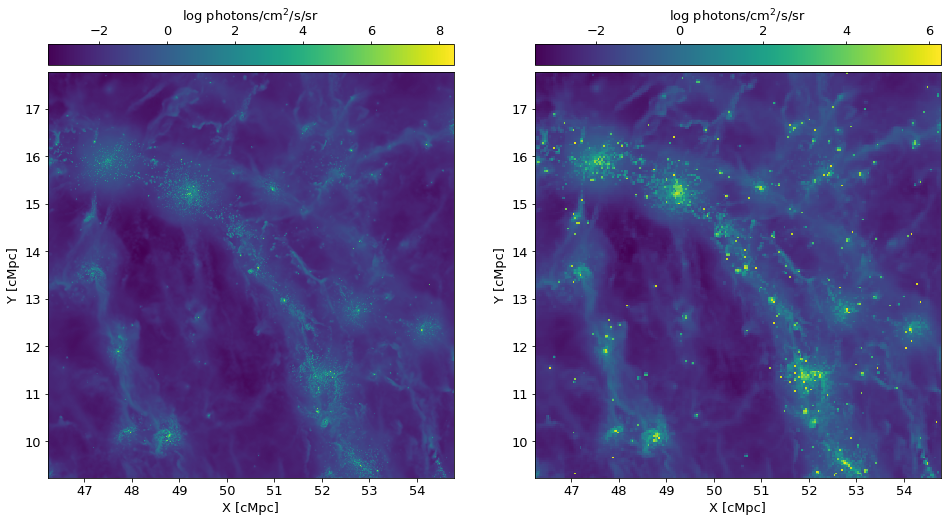

In [53]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
get_halpha_SB.makemap(data_FOV, size, ax1,xystarts = xystarts)

factor = 12.
#lowres = get_halpha_SB.imreduce(data_FOV, factor, log=True, method = 'average') 
lowres, mask_none, fillvalue_none = imreduce_masked(data_FOV, factor, log=True, masking=False) 
get_halpha_SB.makemap(lowres, size, ax2,xystarts = xystarts)


In [54]:
data_FOV+1 # since in log10 space, this is equivalent to multiplying by 10

array([[ 1.15924859,  1.42160726,  1.65519786, ..., -1.95308161,
        -1.94928956, -1.94192863],
       [ 1.02119386,  1.26505399,  1.4110322 , ..., -1.94142461,
        -1.93686318, -1.92870569],
       [ 0.83511984,  1.07744682,  1.21010327, ..., -1.92698264,
        -1.92122912, -1.91194725],
       ..., 
       [-0.54234004, -0.5448029 , -0.5487659 , ..., -1.16068006,
        -1.15473342, -1.14819145],
       [-0.56379616, -0.56630242, -0.57013452, ..., -1.16375113,
        -1.15760398, -1.15075994],
       [-0.58271098, -0.58496523, -0.58869946, ..., -1.1660254 ,
        -1.15973186, -1.15265727]], dtype=float32)

******* Adding noise to the input data to simulate a mock observation by the 48.0 lens Dragonfly Telescope *******
DEBUGGING: the binpix_size (resolution) is 0.6
DEBUGGING: the pixel size (inherent) is 2.8
VERBOSE: Using new CMOS cameras... (QE = 0.70, R = 2.)

Inputting CASTOR values

area_lens=7853.98163397,pix_size=0.5,tau_l=0.85,tau_f=1.0,D=0.04,R=2.0,QE=0.7

DEBUGGING: R is : 2.0
DEBUGGING: the number of pixels per bin is 1.0
DEBUGGING: raise the data by 10** since was logged data before...
DEBUGGING: the total object signal [electrons] detected ranges from: 0.00313918 to 2.60567e+09
The width of the filter that the data was taken with is None nm. 
Sky background is zero.
Adding sky background noise and shot noise...
DEBUGGING: the background in the bandwidth is: 0.0 photon/s/arcsec^2/m^2
DEBUGGING: the background signal, B_sky, is: 0.0 electron/s/pixel
DEBUGGING: the mean total background signal, B_sky_total [electrons], is: 0.0
DEBUGGING: the total background noisy signal [elect

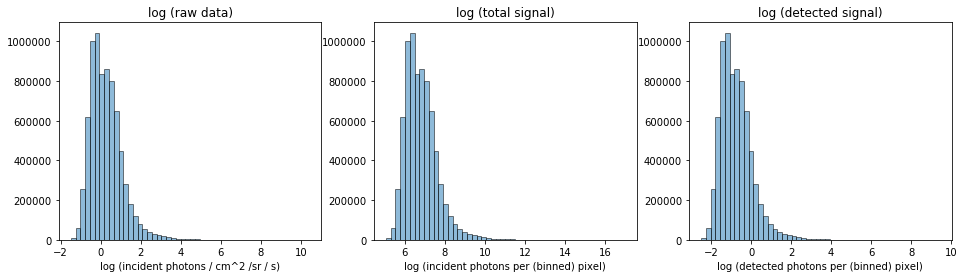

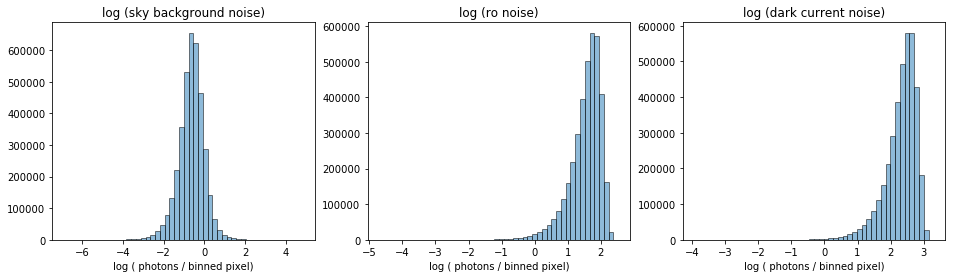

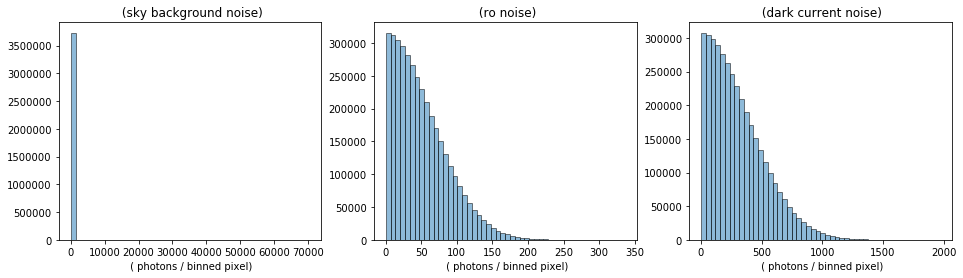

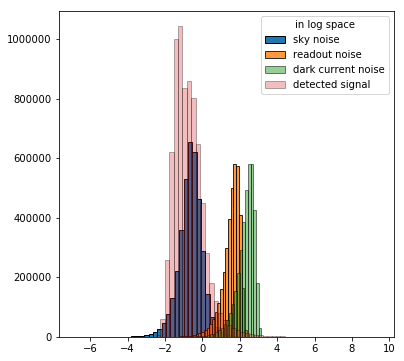

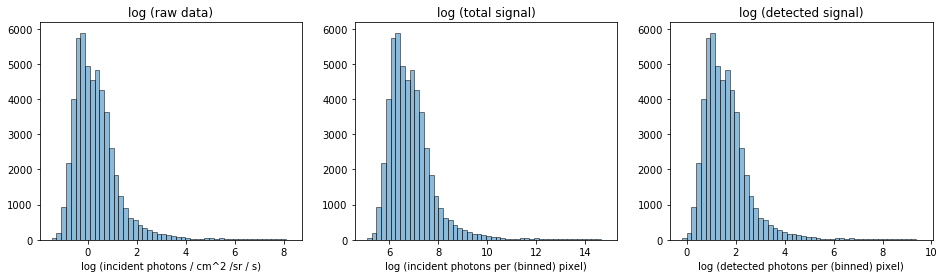

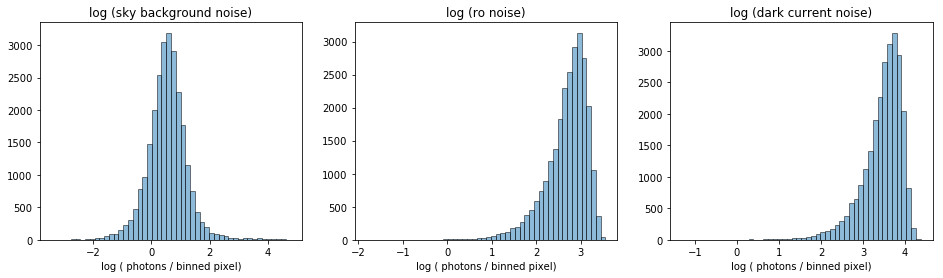

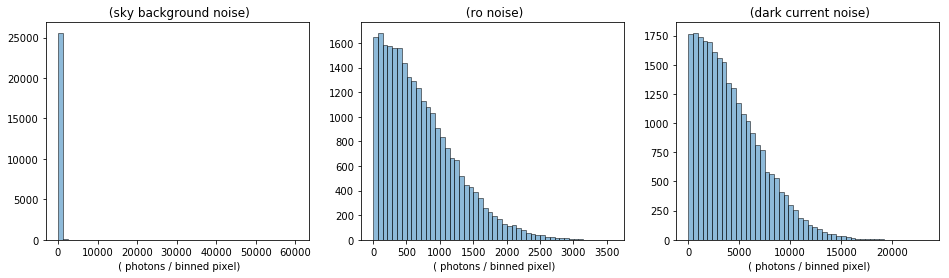

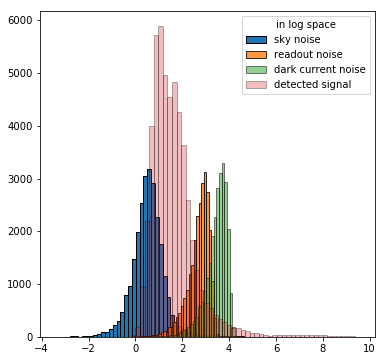

In [57]:
noiseadded_signal,B_sky_array,R_array,D_array = addnoise(data_FOV+2.,resolution,exptime = 1000.*60.*60.,plotchecks=True,\
                                                         filterwidth=None,CMOS=True,R=None,debugging=True,CASTOR=True)


noiseadded_signal_lowres,B_sky_array_lowres,R_array_lowres,D_array_lowres = addnoise(lowres+2.,resolution*factor,exptime = 1000.*60.*60.,plotchecks=True,\
                                                         filterwidth=None,CMOS=True,R=None,debugging=True,CASTOR=True)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


The type of size is <type 'list'>


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10


The type of size is <type 'list'>


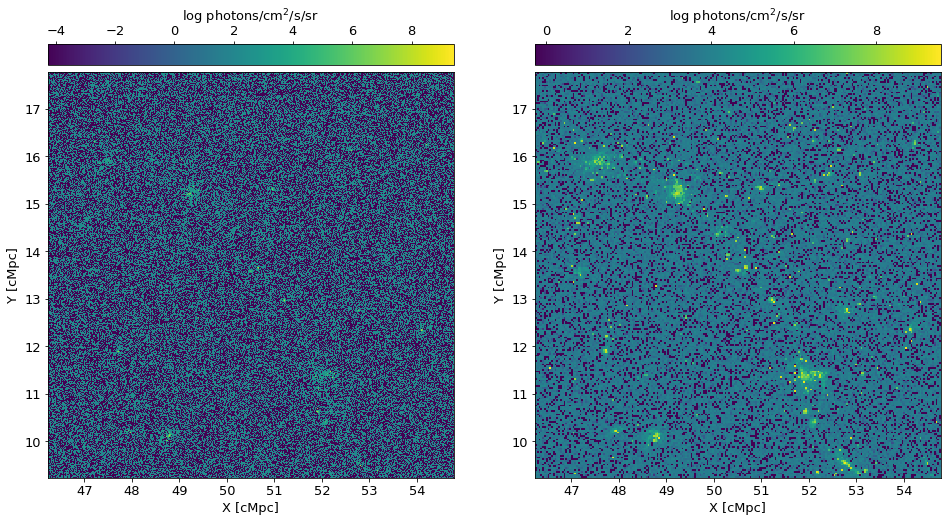

In [63]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
get_halpha_SB.makemap(np.log10(noiseadded_signal), size, ax1,xystarts = xystarts)

get_halpha_SB.makemap(np.log10(noiseadded_signal_lowres+0.0001*np.std(noiseadded_signal_lowres)), size, ax2,xystarts = xystarts)


In [45]:
print len(noiseadded_signal_lowres[noiseadded_signal_lowres<0])
print len(noiseadded_signal_lowres[noiseadded_signal_lowres>0])
np.std(noiseadded_signal_lowres)

57234
59047


3758116.7067379397